# Step 0: Tải các thư viện cần thiết cho bài báo cáo

In [6]:
!pip install underthesea
!pip install gensim

In [9]:
pip install --upgrade pandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


# Step 1: Dependencies import

In [1]:
import pandas as pd
import numpy as np
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

from underthesea import word_tokenize

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence


# Step 2: Data synthesis


Dataset generated and saved to /content/sample_data/generated_soccer_questions.csv
Number of samples: 50000


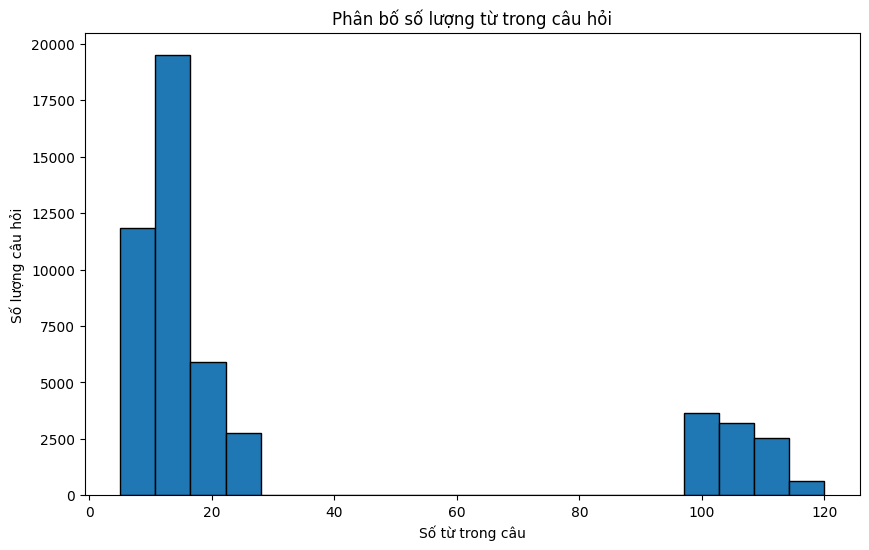

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Define question categories
question_types = [
    "Thông tin chung", "Chiến thuật", "Cầu thủ & Đội bóng", "Lịch sử", "Sự kiện & Giải đấu",
    "Phân tích trận đấu", "Huấn luyện viên", "Kỹ năng cá nhân", "Chiến thuật đội bóng",
    "Phong cách thi đấu", "Chuyển nhượng & Thị trường", "Cổ động viên & Văn hóa bóng đá",
    "Sự nghiệp cầu thủ", "Công nghệ trong bóng đá", "Ảnh hưởng xã hội của bóng đá"
]

# Sample keywords for each category
question_keywords = {
    "Thông tin chung": ["bóng đá là gì", "luật việt vị", "VAR", "thời gian thi đấu", "trọng tài", "hệ thống giải đấu", "fair-play", "luật bàn thắng vàng", "luật thay người"],
    "Chiến thuật": ["phòng ngự phản công", "pressing", "tấn công trung lộ", "sơ đồ 4-3-3", "sơ đồ 5-3-2", "chiến thuật tiki-taka", "catenaccio", "gegenpressing", "bẫy việt vị"],
    "Cầu thủ & Đội bóng": ["Messi", "Ronaldo", "Erling Haaland", "Mbappe", "Real Madrid", "Barcelona", "Manchester United", "câu lạc bộ nhiều danh hiệu", "đội hình mạnh nhất"],
    "Lịch sử": ["World Cup đầu tiên", "Euro đầu tiên", "Champions League", "trận đấu nhiều bàn thắng nhất", "cầu thủ ghi nhiều bàn nhất", "sự ra đời luật việt vị", "Pele", "Maradona"],
    "Sự kiện & Giải đấu": ["Champions League", "Euro", "World Cup 2022", "Copa America", "Asian Cup", "V-League", "Premier League", "Bundesliga", "Serie A"],
    "Phân tích trận đấu": ["sơ đồ chiến thuật", "xG (expected goals)", "đánh giá cầu thủ", "thống kê chuyền bóng", "số lần dứt điểm", "tỷ lệ kiểm soát bóng", "phản công nhanh"],
    "Huấn luyện viên": ["Pep Guardiola", "Mourinho", "Sir Alex Ferguson", "Carlo Ancelotti", "chiến thuật huấn luyện viên", "vai trò của HLV trưởng", "HLV đội tuyển quốc gia"],
    "Kỹ năng cá nhân": ["sút bóng", "chuyền bóng", "kiểm soát bóng", "đánh đầu", "cách rê bóng", "cách sút phạt", "cách cản phá", "cách di chuyển không bóng"],
    "Chiến thuật đội bóng": ["tiki-taka", "gegenpressing", "catenaccio", "đội hình pressing", "tấn công tổng lực", "cách xây dựng đội hình", "vai trò của tiền vệ phòng ngự"],
    "Phong cách thi đấu": ["bóng đá đẹp", "bóng đá thực dụng", "bóng đá phòng ngự", "tấn công tổng lực", "bóng đá phản công nhanh", "bóng đá kiểm soát"],
    "Chuyển nhượng & Thị trường": ["thị trường chuyển nhượng", "các vụ chuyển nhượng đắt giá nhất", "luật chuyển nhượng FIFA", "cầu thủ tự do", "cách mua cầu thủ"],
    "Cổ động viên & Văn hóa bóng đá": ["Ultras", "hooligan", "bài hát cổ động", "sự cuồng nhiệt của fan", "cách cổ vũ đội bóng", "lễ hội bóng đá"],
    "Sự nghiệp cầu thủ": ["con đường trở thành cầu thủ chuyên nghiệp", "đào tạo cầu thủ trẻ", "giải nghệ", "chấn thương trong bóng đá", "hành trình của một cầu thủ"],
    "Công nghệ trong bóng đá": ["VAR", "goal-line technology", "phân tích dữ liệu cầu thủ", "thiết bị đo lường thể chất", "công nghệ làm bóng"],
    "Ảnh hưởng xã hội của bóng đá": ["bóng đá và chính trị", "tác động kinh tế của bóng đá", "các tổ chức bóng đá từ thiện", "bóng đá và bạo lực", "vai trò của bóng đá với cộng đồng"]
}

###############################################################################
# Hàm tạo câu hỏi long form fresh (100-120 từ) dựa trên template
###############################################################################
def generate_fresh_long_question(category, keyword):
    """
    Trả về một câu hỏi long form (100-120 từ) dựa trên template được xây dựng sẵn.
    Nếu category có template riêng thì sử dụng, ngược lại dùng template chung.
    """
    long_templates = {
        "Phân tích trận đấu": (
            "Làm thế nào để phân tích đối thủ và điều chỉnh {keyword} cho phù hợp với từng trận đấu cụ thể? "
            "Trong bối cảnh bóng đá hiện đại, việc sử dụng các chỉ số thống kê và phân tích dữ liệu chi tiết đóng vai trò then chốt. "
            "Qua việc nghiên cứu kỹ lưỡng các pha tấn công và phòng ngự, huấn luyện viên có thể nhận diện điểm mạnh cũng như điểm yếu của đối thủ, "
            "từ đó đưa ra các giải pháp chiến lược nhằm tối đa hóa hiệu suất thi đấu và cải thiện kết quả cuối cùng. "
            "Việc này đòi hỏi sự kết hợp giữa kinh nghiệm thực tiễn và công nghệ hiện đại để tạo ra lợi thế cạnh tranh rõ rệt."
        ),
        "Thông tin chung": (
            "Bạn có thể giải thích chi tiết về {keyword} trong bóng đá hiện đại không? "
            "Việc hiểu rõ nguồn gốc và sự phát triển của {keyword} không chỉ giúp người hâm mộ mà còn hỗ trợ các chuyên gia trong việc cải tiến chiến thuật thi đấu. "
            "Qua đó, {keyword} trở thành một yếu tố không thể thiếu trong việc định hình lối chơi và nâng cao chất lượng thi đấu của đội bóng. "
            "Phân tích sâu sắc về {keyword} còn mở ra những cơ hội đổi mới, từ đó tạo nên một phong cách thi đấu sáng tạo và hiệu quả."
        )
        # Bạn có thể bổ sung thêm các template cho các category khác
    }
    # Template mặc định nếu category không có long template riêng
    default_template = (
        "Bạn có thể giải thích chi tiết về {keyword} trong bóng đá hiện đại không? "
        "Việc phân tích kỹ lưỡng về {keyword} giúp nâng cao hiểu biết về chiến thuật, hỗ trợ các huấn luyện viên đưa ra các quyết định chiến lược chính xác, "
        "và cải thiện hiệu suất thi đấu của đội bóng trên sân cỏ. Sự kết hợp giữa dữ liệu thống kê và kinh nghiệm thực tiễn là chìa khóa để hiểu rõ tầm quan trọng của {keyword}."
    )
    template = long_templates.get(category, default_template)
    # Định dạng template với keyword
    long_question = template.format(keyword=keyword)
    # Kiểm tra số từ
    words = long_question.split()
    # Nếu số từ chưa đủ 100, thêm một câu kết mở rộng nữa
    if len(words) < 100:
        long_question += " Điều này đòi hỏi sự nghiên cứu và thực hành liên tục từ phía các chuyên gia."
    # Nếu vượt quá 120 từ, cắt bớt (ở đây ta đơn giản cắt bớt từ cuối)
    words = long_question.split()
    if len(words) > 120:
        long_question = " ".join(words[:120])
        if not long_question.endswith("?"):
            long_question += "?"
    else:
        if not long_question.endswith("?"):
            long_question += "?"
    # Viết hoa chữ đầu
    long_question = long_question[0].upper() + long_question[1:]
    return long_question

###############################################################################
# TẠO DATASET
###############################################################################
num_samples = 40000  # Số câu ngắn ban đầu
question_corpus = []

# Các template cho câu hỏi ngắn
templates = {
    "Thông tin chung": [
        "Bạn có thể giải thích {keyword} không?",
        "{keyword} có vai trò gì trong bóng đá?",
        "Luật {keyword} áp dụng như thế nào?",
        "{keyword} ảnh hưởng thế nào đến trận đấu?",
        "Làm thế nào để hiểu rõ hơn về {keyword}?"
    ],
    "Chiến thuật": [
        "Chiến thuật {keyword} hoạt động ra sao?",
        "{keyword} có hiệu quả không trong bóng đá hiện đại?",
        "Đội nào áp dụng {keyword} thành công nhất?"
    ],
    "Cầu thủ & Đội bóng": [
        "{keyword} có phải là cầu thủ vĩ đại nhất không?",
        "Tại sao {keyword} được xem là đặc biệt?"
    ],
    "Lịch sử": [
        "Câu chuyện đằng sau {keyword} là gì?",
        "Tại sao {keyword} là khoảnh khắc đáng nhớ?"
    ],
    "Sự kiện & Giải đấu": [
        "{keyword} có gì đặc biệt?",
        "Giải đấu {keyword} có sức ảnh hưởng ra sao?"
    ],
    "Phân tích trận đấu": [
        "Làm thế nào để phân tích đối thủ và điều chỉnh {keyword} cho phù hợp với từng trận đấu cụ thể?"
    ],
    "Huấn luyện viên": [
        "Tại sao {keyword} là một HLV xuất sắc?",
        "Triết lý huấn luyện của {keyword} là gì?"
    ],
    "Kỹ năng cá nhân": [
        "Làm thế nào để cải thiện {keyword} trong bóng đá?",
        "Cách luyện tập để nâng cao {keyword} là gì?"
    ],
    "Chiến thuật đội bóng": [
        "Làm thế nào để xây dựng {keyword} hiệu quả?",
        "Các đội bóng hàng đầu áp dụng {keyword} như thế nào?"
    ],
    "Phong cách thi đấu": [
        "Cách nhận biết phong cách {keyword} trong bóng đá?",
        "{keyword} ảnh hưởng thế nào đến chiến thuật của đội bóng?"
    ],
    "Chuyển nhượng & Thị trường": [
        "Thị trường chuyển nhượng có ảnh hưởng như thế nào đến {keyword}?",
        "Các vụ chuyển nhượng liên quan đến {keyword} được tổ chức ra sao?"
    ],
    "Cổ động viên & Văn hóa bóng đá": [
        "Cách cổ vũ của fan đối với {keyword} được thể hiện ra sao?",
        "Văn hóa cổ động viên liên quan đến {keyword} có đặc điểm gì nổi bật?"
    ],
    "Sự nghiệp cầu thủ": [
        "Hành trình của {keyword} trên con đường trở thành cầu thủ chuyên nghiệp là gì?",
        "Những thử thách trong sự nghiệp của {keyword} được vượt qua như thế nào?"
    ],
    "Công nghệ trong bóng đá": [
        "VAR đã thay đổi cách thức thi đấu như thế nào?",
        "Công nghệ {keyword} đóng góp ra sao cho sự chính xác trong trận đấu?"
    ],
    "Ảnh hưởng xã hội của bóng đá": [
        "Bóng đá có tác động như thế nào đến chính trị và kinh tế?",
        "Vai trò của {keyword} trong cộng đồng được nhìn nhận ra sao?"
    ]
}

# Sinh các câu hỏi ngắn
for _ in range(num_samples):
    category = np.random.choice(question_types)
    keyword = np.random.choice(question_keywords.get(category, ["bóng đá"]))
    template = np.random.choice(templates.get(category, [f"Thông tin về {keyword}?"]))
    short_question = template.format(keyword=keyword)
    question_corpus.append((short_question, category))

# Sinh thêm các câu long form fresh (100-120 từ)
n_long_questions = 10000  # Số lượng câu long form muốn thêm
for _ in range(n_long_questions):
    category = np.random.choice(question_types)
    keyword = np.random.choice(question_keywords.get(category, ["bóng đá"]))
    long_question = generate_fresh_long_question(category, keyword)
    question_corpus.append((long_question, category))

###############################################################################
# LƯU DATASET RA FILE CSV
###############################################################################
output_df = pd.DataFrame(question_corpus, columns=["text", "label"])
output_file = "/content/sample_data/generated_soccer_questions.csv"
output_df.to_csv(output_file, index=False)

print(f"Dataset generated and saved to {output_file}")
print(f"Number of samples: {len(output_df)}")

###############################################################################
# ĐỌC FILE VÀ TẠO BIỂU ĐỒ PHÂN BỐ SỐ TỪ
###############################################################################
df = pd.read_csv(output_file)

def count_words(sentence):
    return len(str(sentence).split())

df['word_count'] = df['text'].apply(count_words)

plt.figure(figsize=(10, 6))
df['word_count'].hist(bins=20, edgecolor='black')
plt.xlabel('Số từ trong câu')
plt.ylabel('Số lượng câu hỏi')
plt.title('Phân bố số lượng từ trong câu hỏi')
plt.grid()
plt.show()


# Step 2.5: Đánh giá dataset và các thuộc tính đặc trưng bên trong



Sample Data:
                                                 text  \
0       Tại sao Carlo Ancelotti là một HLV xuất sắc?   
1  Vai trò của các tổ chức bóng đá từ thiện trong...   
2  Hành trình của hành trình của một cầu thủ trên...   
3  Cách nhận biết phong cách bóng đá phòng ngự tr...   
4  Các vụ chuyển nhượng liên quan đến luật chuyển...   

                          label  
0               Huấn luyện viên  
1  Ảnh hưởng xã hội của bóng đá  
2             Sự nghiệp cầu thủ  
3            Phong cách thi đấu  
4    Chuyển nhượng & Thị trường  

Missing Values:
 text     0
label    0
dtype: int64


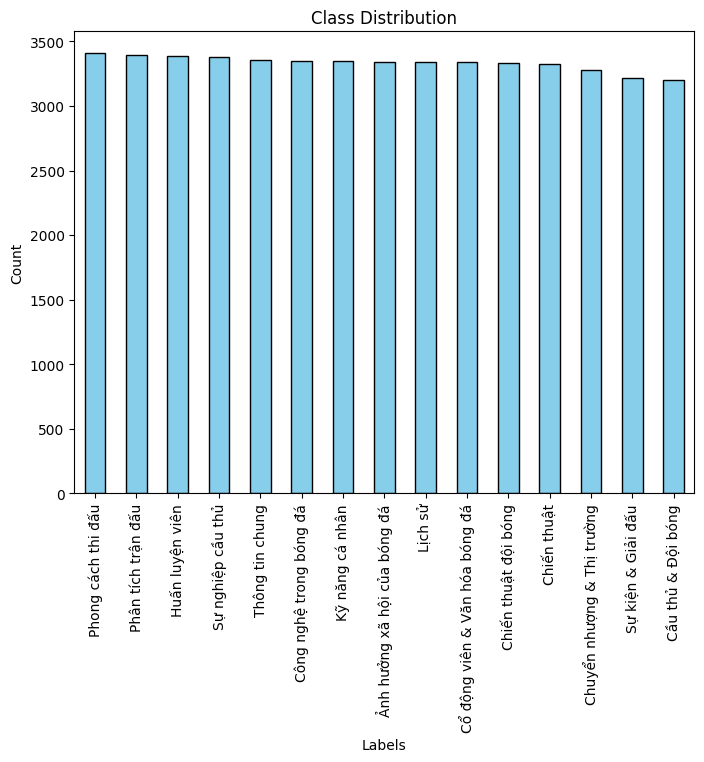

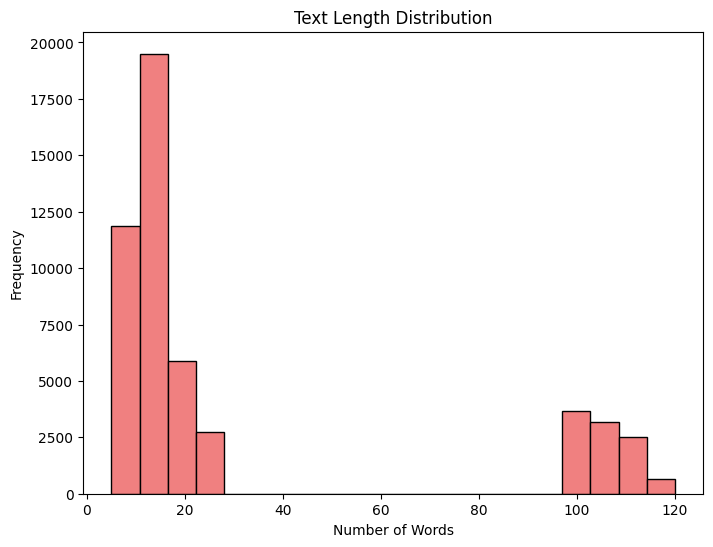


Most common words: [('bóng', 38615), ('và', 35896), ('của', 31775), ('các', 29566), ('về', 27915), ('chiến', 21678), ('đá', 21448), ('là', 19925), ('trong', 19893), ('có', 19845)]
Lexical Diversity: 0.0003


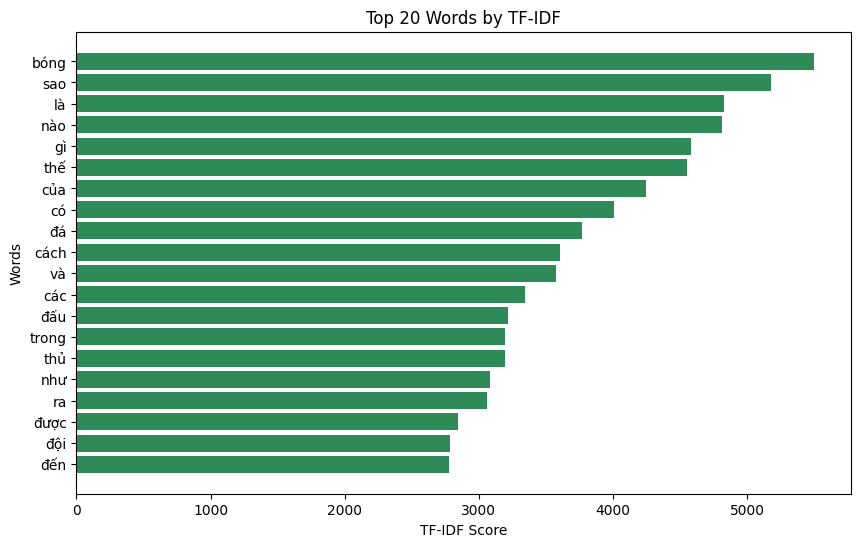

In [9]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    print("\nSample Data:\n", df.head())
    return df

def check_missing_duplicates(df):
    print("\nMissing Values:\n", df.isnull().sum())

def plot_class_distribution(df):
    plt.figure(figsize=(8, 6))
    df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Class Distribution")
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.savefig("class_distribution.png")
    plt.show()

def plot_text_length_distribution(df):
    df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(8, 6))
    plt.hist(df['text_length'], bins=20, color='lightcoral', edgecolor='black')
    plt.title("Text Length Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.savefig("text_length_distribution.png")
    plt.show()

def check_word_frequency(df):
    all_words = " ".join(df['text']).split()
    word_freq = Counter(all_words)
    print("\nMost common words:", word_freq.most_common(10))

    unique_words = len(set(all_words))
    total_words = len(all_words)
    print(f"Lexical Diversity: {unique_words / total_words:.4f}")

def plot_top_tfidf_words(df):
    vectorizer = TfidfVectorizer(max_features=100)
    X_tfidf = vectorizer.fit_transform(df['text'].astype(str))

    tfidf_words = vectorizer.get_feature_names_out()
    tfidf_values = X_tfidf.toarray().sum(axis=0)

    sorted_indices = tfidf_values.argsort()[::-1][:20]
    top_words = tfidf_words[sorted_indices]
    top_values = tfidf_values[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_words[::-1], top_values[::-1], color='seagreen')
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.title("Top 20 Words by TF-IDF")
    plt.savefig("tfidf_top_words.png")
    plt.show()

def main():
    file_path = "/content/sample_data/generated_soccer_questions.csv"
    df = load_data(file_path)
    check_missing_duplicates(df)
    plot_class_distribution(df)
    plot_text_length_distribution(df)
    check_word_frequency(df)
    plot_top_tfidf_words(df)

if __name__ == "__main__":
    main()


# Step 3: Data preprocessing and representation

In [10]:
df = pd.read_csv("/content/sample_data/generated_soccer_questions.csv")

# Text Processing Class
class TextProcessor:
    def __init__(self, df):
        self.df = df.copy()
        self.clean_text()
        self.y = self.df["label"].astype(str)

    def clean_text(self):
        self.df["clean_text"] = self.df["text"].str.lower()
        self.df["clean_text"] = self.df["clean_text"].str.replace(r"[{}]".format(string.punctuation), "", regex=True)
        self.df["clean_text"] = self.df["clean_text"].str.replace(r"\d+", "", regex=True)
        self.df["clean_text"] = self.df["clean_text"].apply(lambda x: " ".join(word_tokenize(str(x))))  # ✅ Fix: Use only underthesea

    def tfidf_vectorizer(self, X_train, X_test, max_features=100):
        vectorizer = TfidfVectorizer(max_features=max_features)
        return vectorizer.fit_transform(X_train), vectorizer.transform(X_test)

    def bag_of_words_vectorizer(self, X_train, X_test, max_features=100):
        vectorizer = CountVectorizer(max_features=max_features)
        return vectorizer.fit_transform(X_train), vectorizer.transform(X_test)

    def one_hot_encoding(self, y_train, y_test):
        encoder = OneHotEncoder(sparse_output=False)
        return encoder.fit_transform(y_train.values.reshape(-1, 1)), encoder.transform(y_test.values.reshape(-1, 1))

# Sample 80% of data
df = df.sample(frac=0.8, random_state=42)
df.reset_index(drop=True, inplace=True)

print("Dữ liệu mẫu:")
print(df.head())

processor = TextProcessor(df)  # Original processor for full dataset

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# Create Processors for Train & Test
processor_train = TextProcessor(pd.DataFrame({"text": X_train_raw, "label": y_train}))
processor_test = TextProcessor(pd.DataFrame({"text": X_test_raw, "label": y_test}))

X_train, X_test = processor_train.df["clean_text"], processor_test.df["clean_text"]

# Vectorization
X_tfidf_train, X_tfidf_test = processor_train.tfidf_vectorizer(X_train, X_test)
X_bow_train, X_bow_test = processor_train.bag_of_words_vectorizer(X_train, X_test)

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-Hot Encoding
X_one_hot_train, X_one_hot_test = processor_train.one_hot_encoding(y_train, y_test)

# Shape Summary
print("TF-IDF Shape:", X_tfidf_train.shape)
print("BoW Shape:", X_bow_train.shape)
print("One-Hot Shape:", X_one_hot_train.shape)


Dữ liệu mẫu:
                                                text  \
0  Thị trường chuyển nhượng có ảnh hưởng như thế ...   
1  Cách nhận biết phong cách bóng đá thực dụng tr...   
2  Đội nào áp dụng phòng ngự phản công thành công...   
3         Cách luyện tập để nâng cao đánh đầu là gì?   
4         bóng đá là gì có vai trò gì trong bóng đá?   

                        label  
0  Chuyển nhượng & Thị trường  
1          Phong cách thi đấu  
2                 Chiến thuật  
3             Kỹ năng cá nhân  
4             Thông tin chung  
TF-IDF Shape: (32000, 100)
BoW Shape: (32000, 100)
One-Hot Shape: (32000, 15)


# Step 4: Lựa chọn model, training và đánh giá dựa trên các phương thức vector hóa câu từ



Using Bag of Words representation:

Model: Logistic Regression
Accuracy: 0.9175
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       531
           1       0.97      0.88      0.92       537
           2       0.94      1.00      0.97       528
           3       1.00      0.92      0.96       528
           4       1.00      0.84      0.91       504
           5       1.00      0.88      0.93       536
           6       1.00      0.62      0.77       544
           7       1.00      0.97      0.99       534
           8       0.78      0.85      0.81       533
           9       0.97      0.97      0.97       544
          10       1.00      1.00      1.00       546
          11       0.54      1.00      0.70       521
          12       1.00      0.96      0.98       540
          13       1.00      1.00      1.00       541
          14       1.00      1.00      1.00       533

    accuracy                  

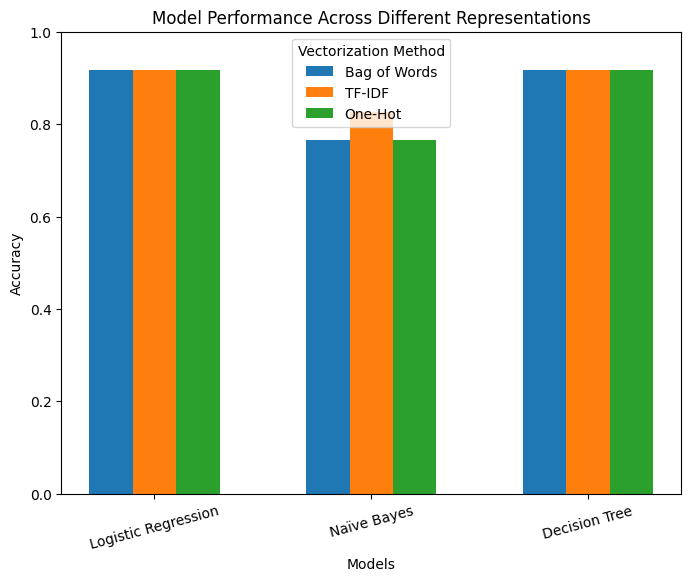

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier()
}

vectorizers = {
    "Bag of Words": (X_bow_train, X_bow_test),
    "TF-IDF": (X_tfidf_train, X_tfidf_test),
    "One-Hot": (X_one_hot_train, X_one_hot_test)
}

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Store accuracy results
accuracy_results = {}

for vec_name, (X_train_enc, X_test_enc) in vectorizers.items():
    print(f"\nUsing {vec_name} representation:")
    accuracy_results[vec_name] = {}

    for model_name, model in models.items():
        print(f"\nModel: {model_name}")

        # Ensure labels are in the correct format
        if vec_name == "One-Hot":
            X_train_enc, X_test_enc = processor.bag_of_words_vectorizer(X_train, X_test)
            y_train_enc, y_test_enc = y_train_encoded, y_test_encoded  # Use LabelEncoder()
        else:
            y_train_enc, y_test_enc = y_train_encoded, y_test_encoded  # Ensure labels are encoded


        model.fit(X_train_enc, y_train_enc)
        y_pred = model.predict(X_test_enc)

        acc = accuracy_score(y_test_enc, y_pred)
        accuracy_results[vec_name][model_name] = acc  # Store accuracy

        print("Accuracy:", acc)
        print("Classification Report:")
        print(classification_report(y_test_enc, y_pred))

# Plot accuracy results
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
index = np.arange(len(models))

for i, (vec_name, acc_dict) in enumerate(accuracy_results.items()):
    accuracies = [acc_dict[m] for m in models.keys()]
    ax.bar(index + i * bar_width, accuracies, bar_width, label=vec_name)

ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Model Performance Across Different Representations")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models.keys(), rotation=15)
ax.legend(title="Vectorization Method")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Step 5: Doc2Vec


In [12]:
# Load dataset
df = pd.read_csv("/content/sample_data/generated_soccer_questions.csv")

# Preprocess text data
df["text"] = df["text"].str.lower().str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)

# Encode labels
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label_encoded"], test_size=0.2, random_state=42)

# --- Gensim Doc2Vec ---
train_corpus = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_train)]
test_corpus = [text.split() for text in X_test]

gensim_model = Doc2Vec(vector_size=50, window=5, min_count=2, workers=4, epochs=10)
gensim_model.build_vocab(train_corpus)
gensim_model.train(train_corpus, total_examples=gensim_model.corpus_count, epochs=gensim_model.epochs)

X_train_gensim = [gensim_model.infer_vector(doc.words) for doc in train_corpus]
X_test_gensim = [gensim_model.infer_vector(doc) for doc in test_corpus]

# --- Custom PyTorch Doc2Vec ---
class Doc2VecDataset(Dataset):
    def __init__(self, texts, labels, vocab):
        self.texts = [[vocab.get(w, 0) for w in text.split()] for text in texts]
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

vocab = {word: i+1 for i, word in enumerate(set(" ".join(X_train).split()))}
vocab["<PAD>"] = 0

train_dataset = Doc2VecDataset(X_train, y_train.tolist(), vocab)
test_dataset = Doc2VecDataset(X_test, y_test.tolist(), vocab)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




In [13]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Custom Dataset Class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts  # Already tokenized sequences
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx], dtype=torch.long), self.labels[idx]

# Custom collate function for dynamic padding
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=0).to(device)  # Apply padding
    labels = torch.tensor(labels, dtype=torch.long).to(device)
    return texts_padded, labels

# Define PyTorch Doc2Vec Model
class SimpleDoc2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleDoc2Vec, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.fc = nn.Linear(embedding_dim, 50)
        self.bn = nn.BatchNorm1d(50)  # Normalize embeddings for better stability

    def forward(self, x):
        embedded = self.embedding(x)  # Shape: (batch, seq_len, embedding_dim)
        x = embedded.mean(dim=1)  # Average over the sequence length
        x = self.bn(self.fc(x))  # Apply batch normalization
        return x

# Model setup
embedding_dim = 50
vocab_size = len(vocab) + 1  # +1 for padding index
model = SimpleDoc2Vec(vocab_size, embedding_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Training function
def train_model(num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for texts, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")

# Train the model
train_model(num_epochs=5)

# Function to extract document vectors
def get_pytorch_vectors(dataloader):
    model.eval()
    vectors = []
    with torch.no_grad():
        for texts, _ in dataloader:
            outputs = model(texts)  # Get doc vectors
            vectors.append(outputs.cpu().numpy())  # Ensure conversion from GPU to CPU
    return np.vstack(vectors)

# Extract vectors
X_train_torch = get_pytorch_vectors(train_loader)
X_test_torch = get_pytorch_vectors(test_loader)


Epoch 1/5, Loss: 0.9392
Epoch 2/5, Loss: 0.1758
Epoch 3/5, Loss: 0.0905
Epoch 4/5, Loss: 0.0640
Epoch 5/5, Loss: 0.0516


In [14]:
# --- Classifier Evaluation ---
clf_gensim = LogisticRegression(max_iter=500).fit(X_train_gensim, y_train)
y_pred_gensim = clf_gensim.predict(X_test_gensim)
acc_gensim = accuracy_score(y_test, y_pred_gensim)

clf_torch = LogisticRegression(max_iter=10000).fit(X_train_torch, y_train)
y_pred_torch = clf_torch.predict(X_test_torch)
acc_torch = accuracy_score(y_test, y_pred_torch)

print(f"Gensim Doc2Vec Accuracy: {acc_gensim:.4f}")
print(f"PyTorch Doc2Vec Accuracy: {acc_torch:.4f}")

Gensim Doc2Vec Accuracy: 0.6155
PyTorch Doc2Vec Accuracy: 0.0723
